In [21]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


Here is the quantum circuit for quantum teleportation I will be attempting to build in this project. 

![Screenshot 2024-09-09 at 2.42.41 PM 1.png](<attachment:Screenshot 2024-09-09 at 2.42.41 PM 1.png>)
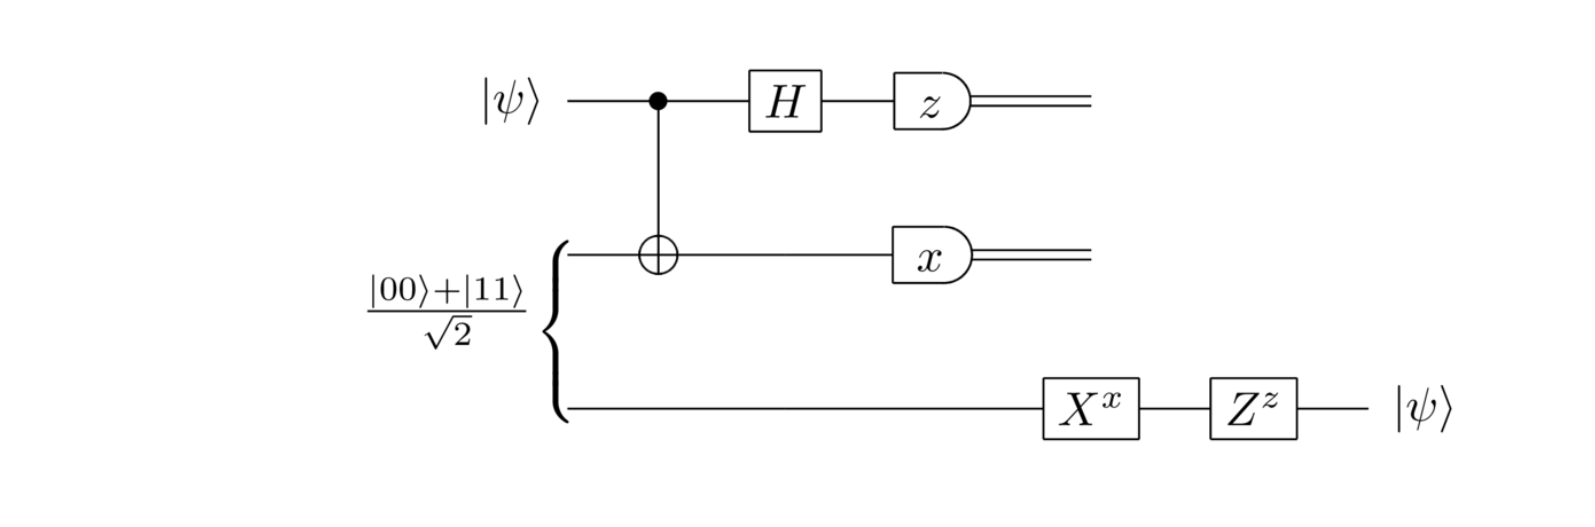

In [22]:
## create a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 2)

## creating the relevant architecture
qc.cx(0, 1)
qc.h(0)
qc.x(1)
qc.z(0)

## classical measurements
qc.measure(0,0)
qc.measure(1,1)

## using classical bits to determine operations
qc.x(2).c_if(0, 1)
qc.z(2).c_if(1, 1)

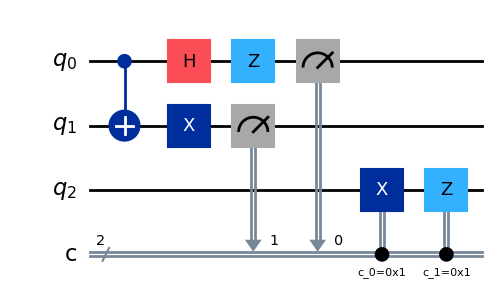

In [23]:
## Visualize the quantum circuit using matplot
qc.draw('mpl')

In [24]:
## instansitate the device and match the backend's ISA
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

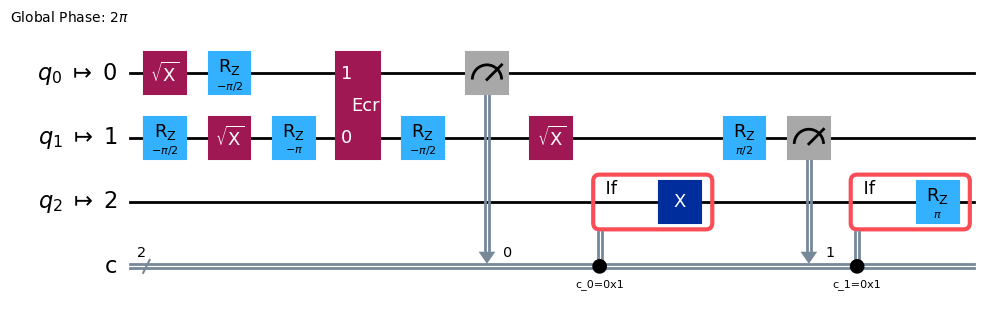

In [25]:
isa_circuit.draw('mpl', idle_wires=False)

In [27]:
## run the circuit and store the result
with Session(service=service, backend=backend) as session:
    sampler = Sampler(session=session)
    result = sampler.run([isa_circuit]).result()

/var/folders/k0/ld1rp8ns1b94_xk2ch1rldtc0000gn/T/ipykernel_27865/1103756444.py:2: DeprecationWarning: The service parameter is deprecated as of qiskit-ibm-runtime 0.26.0 and will be removed no sooner than 3 months after the release date. The service can be extracted from the backend object so it is no longer necessary.
  with Session(service=service, backend=backend) as session:
/var/folders/k0/ld1rp8ns1b94_xk2ch1rldtc0000gn/T/ipykernel_27865/1103756444.py:3: DeprecationWarning: The 'session' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(session=session)


In [18]:
print(result)

NameError: name 'result' is not defined